# Ollama 玩转本地大模型


通常而言，依据经验([每个大模型开发者都应该知道的数字](https://github.com/NascentCore/llm-numbers-cn))来看，对于16位浮点精度（FP16）的模型，其推理所需的显存（单位是GB）大概是模型参数量（以10亿为单位）的两倍。例如，Llama 2 7B（70亿参数量），按照这个规律，其推理大约需要14GB的显存，这显然是普通家用计算机的硬件规格所无法满足的。就拿一块GeForce RTX 4060 Ti 16GB显卡来说，它的市场价超过3000元。

不过，模型量化（quantization）技术却能够在很大程度上降低显存的要求。以4 - bit量化为例，它可以把原本是FP16精度的权重参数压缩成4位整数精度，这样一来，模型权重的体积以及推理所需的显存都会大幅减小，仅为FP16的1/4到1/3，也就是说，大约4GB的显存就能够启动7B模型的推理了（当然，实际的显存需求会随着上下文内容的增加而不断变大）。

同时，llama.cpp项目使用C/C++重新编写了推理代码，这不仅避免了因使用PyTorch而带来的复杂依赖关系，还提供了更为广泛的硬件支持，像纯CPU推理以及Apple Silicon等各类底层计算架构都能够充分发挥其相应的推理加速能力。由于Llama架构很受欢迎，所以llama.cpp的量化和推理能力几乎可以毫无阻碍地应用到相同架构的开源大语言模型上。

然而，尽管llama.cpp有这么多优点，但是当人们真正想要尝试使用它的时候，却会发现需要经历获取模型权重、克隆项目代码、执行模型量化、设置环境变量、构建可执行文件等众多环节，才能以命令行的形式提出一个测试问题，更不用说还有可能需要手动调整的数十个参数了。

因此，在很长的一段时间里，本地大模型以及基于llama.cpp的应用都只是局限在少数极客和研究者的小圈子里，较高的使用门槛把很多普通人都挡在了外面。

直到Ollama出现，它是一个简单易用的本地大模型运行框架。随着围绕Ollama的生态逐渐发展起来，更多的用户也能够方便地在自己的电脑上使用大模型了。

## 安装

打开官网[https://ollama.com/download](https://ollama.com)，即可根据电脑类型下载对应的客户端，目前Windows 客户端版本为（教程版本是v0.6.1，大小是1G）。

下载后，建议通过命令行执行安装，以便修改安装路径：`.\OllamaSetup.exe /DIR="d:\Ollama"`
> 直接双击安装会默认安装至：%USERPROFILE%\AppData\Local\Programs\Ollama

<br>

默认下载的模型保存在目录：`%USERPROFILE%\.ollama` 。
可以通过添加系统环境变量 `OLLAMA_MODELS` 修改模型的安装目录（请先退出Ollama）

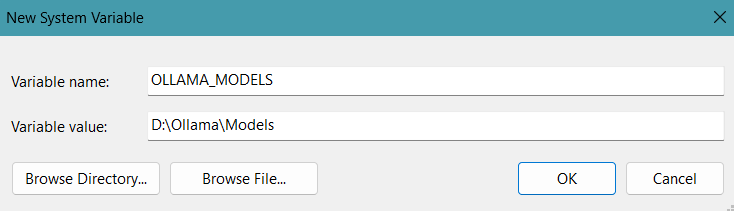

<br>
默认的配置文件目录：%USERPROFILE%\AppData\Local\Ollama
<br>

安装完毕后，会默认直接启动，启动成功后会在任务栏右下角，显式图标：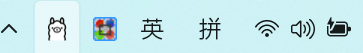


## 使用

除了双击对应ollama 应用启动后，还可以通过命令行启停安装完毕后，打开`Terminal` 执行`ollama` 命令，即可查看ollama 支持的系列指令：
```
PS C:\Users\shengjie> ollama
Usage:
  ollama [flags]
  ollama [command]

Available Commands:
  serve       Start ollama
  create      Create a model from a Modelfile
  show        Show information for a model
  run         Run a model
  stop        Stop a running model
  pull        Pull a model from a registry
  push        Push a model to a registry
  list        List models
  ps          List running models
  cp          Copy a model
  rm          Remove a model
  help        Help about any command

Flags:
  -h, --help      help for ollama
  -v, --version   Show version information

PS C:\Users\shengjie> ollama -v
ollama version is 0.6.1
```


In [24]:
ollama -v

ollama version is 0.6.1


### 拉取模型

当你运行 ollama --version 命令成功查询到版本时，表示 Ollama 的安装已经顺利完成，接下来便可以用 pull 命令从在线模型库(https://ollama.com/library)下载模型来玩了。接下来我们尝试来拉取`deepseek-r1:7b` 模型来玩耍，命令行执行以下命令：
```
PS C:\Users\shengjie> ollama pull deepseek-r1:7b
pulling manifest
pulling 87f26aae09c7... 100% ▕████████████████████████████████████████████████████████▏ 4.5 GB
pulling 7c7b8e244f6a... 100% ▕████████████████████████████████████████████████████████▏ 6.9 KB
pulling 1da0581fd4ce... 100% ▕████████████████████████████████████████████████████████▏  130 B
pulling f02dd72bb242... 100% ▕████████████████████████████████████████████████████████▏   59 B
pulling c0312cf22ef0... 100% ▕████████████████████████████████████████████████████████▏  483 B
verifying sha256 digest
writing manifest
success
PS C:\Users\shengjie> ollama list
NAME              ID              SIZE      MODIFIED
deepseek-r1:7b    0a8c26691023    4.7 GB    7 minutes ago
```

In [25]:
ollama list

NAME                                 ID              SIZE      MODIFIED    
llama3.2:latest                      a80c4f17acd5    2.0 GB    3 hours ago    
qwen:7b                              2091ee8c8d8f    4.5 GB    3 hours ago    
quentinz/bge-large-zh-v1.5:latest    bc8ca0995fcd    651 MB    4 hours ago    
deepseek-r1:7b                       0a8c26691023    4.7 GB    4 hours ago    



### 运行模型
当模型下载完毕后，可以直接命令行执行`ollama run {model}` 来启动即可，如下：
```
PS C:\Users\shengjie> ollama run deepseek-r1:7b

>>> Send a message (/? for help)

>>> /?
Available Commands:
  /set            Set session variables
  /show           Show model information
  /load <model>   Load a session or model
  /save <model>   Save your current session
  /clear          Clear session context
  /bye            Exit
  /?, /help       Help for a command
  /? shortcuts    Help for keyboard shortcuts

Use """ to begin a multi-line message.

>>> /show info
  Model
    architecture        deepseek-r12
    parameters          7.6B
    context length      131072
    embedding length    3584
    quantization        Q4_K_M

  Parameters
    stop    "<｜begin▁of▁sentence｜>"
    stop    "<｜end▁of▁sentence｜>"
    stop    "<｜User｜>"
    stop    "<｜Assistant｜>"

  License
    MIT License
    Copyright (c) 2023 DeepSeek

>>> 你是谁？
<think>

</think>

您好！我是由中国的深度求索（DeepSeek）公司开发的智能助手DeepSeek-R1。如您有任何任何问题，我会尽我所能为您提供帮助。

>>> /bye
```


#### 设置系统提示词

```
>>> /set
Available Commands:
  /set parameter ...     Set a parameter
  /set system <string>   Set system message
  /set history           Enable history
  /set nohistory         Disable history
  /set wordwrap          Enable wordwrap
  /set nowordwrap        Disable wordwrap
  /set format json       Enable JSON mode
  /set noformat          Disable formatting
  /set verbose           Show LLM stats
  /set quiet             Disable LLM stats
>>> /set system 你是一名小红书风格文案写手，请使用 Emoji 风格改写用户提供的文案，该风格以引人入胜的标题、每个段落中包含
... 表情符号和在末尾添加相关标签为特点。请确保保持原文的意思。
Set system message.
>>> /show system
你是一名小红书风格文案写手，请使用 Emoji 风格改写用户提供的文案，该风格以引人入胜的标题、每个段落中包含表情符号和在末尾添加相关标签为特点。请确保保持原文的意思。

>>> 《环球时报》记者提问：据报道，美国国务卿布林肯日前在《外交事务》刊文称，中国是唯一既有意愿、又有能力重塑国际体系的国
... 家。拜登总统将中国称作“步步紧逼的挑战”、最具影响力的长期战略竞争对手。中方对此有何评论？
... 毛宁表示，美方官员的这些谬论不是什么新话。我们也说过很多次了，大国竞争不符合时代潮流，更解决不了美国自身的问题和世界
... 面临的挑战。美方从战略竞争的视角看待国际形势、定义中美关系，是对冷战思维的执念，把中国当作长期战略竞争对手和“步步紧
... 逼的挑战”，是以自己的霸权历史、霸权思维镜像他国，是对中国和中美关系的严重误判，既不符合两国人民根本利益，也不符合国
... 际社会的普遍期待。
... 毛宁强调，中国始终是世界和平的建设者、全球发展的贡献者和国际秩序的维护者。事实上，所谓搞不公平竞争、采取咄咄逼人行动
... 、到处耀武扬威、施压胁迫的，正是美国，而不是别人。
🔥【美务卿布林肯狂言】💥

据《外交事务》杂志，美国国务卿布林肯大放厥词，称中国是重塑国际体系唯一有能力和意愿的国家！😱

拜登总统呢？他把中国描绘成一个步步紧逼的挑战者。👀

中国回应来了，毛宁发言人强调：大国竞争不符合潮流，中美关系要实事求是，而不是谁在搞不公平竞争！🎯

#布林肯狂言# #中美关系新解读# #中国和平发展力量#
```



#### 设置参数

1. `/set format json` ：启用 Json Mode
2. `/set parameter num_ctx 4096`：设置上下文窗口的token 大小为4096（还可以设置temperature、top_k、top_p等，可设参数详参：[modelfile.md#parameter](https://github.com/ollama/ollama/blob/main/docs/modelfile.md#parameter))

### 自定义模型

Ollama允许用户通过`Modelfile`自定义模型，`Modelfile` 类似`Dockerfile` ，通过`Modelfile` 可以对下载的模型进行自定义，详参： https://github.com/ollama/ollama/blob/main/docs/modelfile.md。

也可以通过`ollama show --modelfile {model}` 来查看具体某个模型的`Modelfile`。

接下来我们尝试将千问设置为一名文案改进助理：

**1. 定义Modelfile**

创建`redbook-ai-modelfile`，内容如下：
```
FROM deepseek-r1:7b
# sets the temperature to 1 [higher is more creative, lower is more coherent]
PARAMETER temperature 1
# sets the context window size to 4096, this controls how many tokens the LLM can use as context to generate the next token
PARAMETER num_ctx 4096

# sets a custom system message to specify the behavior of the chat assistant
SYSTEM 你是一名中文写作改进助理，你的任务是改进所提供文本的拼写、语法、清晰、简洁和整体可读性，同时分解长句，减少重复，并提供改进建议。请只提供文本的更正版本，避免包括解释。
```

**2. 创建自定义模型**
执行`ollama create rewrite-ai -f redbook-ai-modelfile`

**3. 运行自定义模型**
执行`ollama run rewrite-ai`

**4. 测试**

```
ollama create rewrite-ai -f .\rewrite-ai-modelfile
transferring model data 
using existing layer sha256:87f26aae09c7f052de93ff98a2282f05822cc6de4af1a2a159c5bd1acbd10ec4 
using existing layer sha256:7c7b8e244f6aa1ac8c32b74f56d42c41a0364dd2dabed8d9c6030a862e805b54 
using existing layer sha256:1da0581fd4ce92dcf5a66b1da737cf215d8dcf25aa1b98b44443aaf7173155f5 
creating new layer sha256:f0a0557006bab292d768f2581992580aeb1eb35d38bfa558638fa79e4099df04 
creating new layer sha256:0a73740ea421e924afe53e0b59fff35edd9cc156549ea84b96815ec0ba75b509 
creating new layer sha256:f703e3ac557059df3e2ac9f0482a1262967664933408281b266914122986eb46 
writing manifest 
success 
PS C:\Users\shengjie\Config> ollama run rewrite-ai
>>> 《环球时报》记者提问：据报道，美国国务卿布林肯日前在《外交事务》刊文称，中国是唯一既有意愿、又有能力重塑国际体系的国家。拜登总统将中国称作“步步紧逼的挑战”、最具影响力的长期战略竞争对手。中方对此有何评论？
... 毛宁表示，美方官员的这些谬论不是什么新话。我们也说过很多次了，大国竞争不符合时代潮流，更解决不了美国自身的问题和世界面临的挑战。美方从战略竞争的视角看待国际形势、定义中美关系，是对冷战思维的执念，把中国当作长期战略竞争对手
... 和“步步紧逼的挑战”，是以自己的霸权历史、霸权思维镜像他国，是对中国和中美关系的严重误判，既不符合两国人民根本利益，也不符合国际社会的普遍期待。
... 毛宁强调，中国始终是世界和平的建设者、全球发展的贡献者和国际秩序的维护者。事实上，所谓搞不公平竞争、采取咄咄逼人行动、到处耀武扬威、施压胁迫的，正是美国，而不是别人。
《环球时报》记者提问：据报道，美国国务卿布林肯在《外交事务》刊文称，中国是唯一既有意愿又有能力重塑国际体系的国家。拜登总统将中国称为“步步紧逼的挑战”、最具影响力的长期战略竞争对手。中方对此有何评论？

针对上述声明，毛宁表示，美方官员的言论并非新论点。中国政府此前已经多次表达类似观点：大国间的竞争不符合时代趋势，也无法解决美国自身的问题以及世界面临的大挑战。

毛宁强调，从战略竞争的角度看待国际形势和定义中美关系的做法，是冷战思维的体现。这种思维把中国当作一个长期的战略竞争对手和“步步紧逼的挑战”，并且试图用霸权历史和思维来评判其他国家。

毛宁指出，这种对中国的误判不符合两国人民的根本利益，也不符合国际社会普遍期待。中国始终致力于世界和平、全球发展及国际秩序维护，并以实际行动为建设更美好的世界贡献力量。

>>> /bye
```

### 通过API 调用

默认Ollama 模型会通过`127.0.0.1:11434` 提供API 服务。主要提供了两个RESET API，详参：https://github.com/ollama/ollama/blob/main/docs/api.md

#### POST /api/generate

#### generate without stream
```
curl http://localhost:11434/api/generate -d '{
  "model": "deepseek-r1:7b",
  "stream": false,
  "prompt": "Why is the sky blue?"
}'
```

#### generate with json mode
```
curl http://localhost:11434/api/generate -d '{
  "model": "deepseek-r1:7b",
  "prompt": "What color is the sky at different times of the day? Respond using JSON",
  "format": "json",
  "stream": false,
  "options": {
    "temperature": 0.8
  }
}'
```

In [26]:
POST http://localhost:11434/api/generate 
{
  "model": "deepseek-r1:7b",
  "stream": false,
  "prompt": "Why is the sky blue?"
}

Name,Value
traceparent,00-2a1ba567f799b8f383bdc494fc0d460d-2a74d7d0ae73d0c5-00
Content-Type,text/plain; charset=utf-8
Content-Length,86
Name,Value
Date,"Tue, 18 Mar 2025 07:00:20 GMT"
Transfer-Encoding,chunked
Content-Type,application/json; charset=utf-8
Content-Length,6667
model,"""deepseek-r1:7b"""
created_at,"""2025-03-18T07:00:20.9213988Z"""


#### POST /api/chat


##### chat without stream

```
curl http://localhost:11434/api/chat -d '{
  "model": "deepseek-r1:7b",
  "stream": false,
  "messages": [
    {
      "role": "user",
      "content": "why is the sky blue?"
    }
  ]
}'
```

##### chat with tools
```
curl http://localhost:11434/api/chat -d '{
  "model": "llama3.2",
  "messages": [
    {
      "role": "user",
      "content": "What is the weather today in Paris?"
    }
  ],
  "stream": false,
  "tools": [
    {
      "type": "function",
      "function": {
        "name": "get_current_weather",
        "description": "Get the current weather for a location",
        "parameters": {
          "type": "object",
          "properties": {
            "location": {
              "type": "string",
              "description": "The location to get the weather for, e.g. San Francisco, CA"
            },
            "format": {
              "type": "string",
              "description": "The format to return the weather in, e.g. 'celsius' or 'fahrenheit'",
              "enum": ["celsius", "fahrenheit"]
            }
          },
          "required": ["location", "format"]
        }
      }
    }
  ]
}'
```

In [27]:
POST http://localhost:11434/api/chat 
{
  "model": "llama3.2",
  "messages": [
    {
      "role": "user",
      "content": "What is the weather today in Paris?"
    }
  ],
  "stream": false,
  "tools": [
    {
      "type": "function",
      "function": {
        "name": "get_current_weather",
        "description": "Get the current weather for a location",
        "parameters": {
          "type": "object",
          "properties": {
            "location": {
              "type": "string",
              "description": "The location to get the weather for, e.g. San Francisco, CA"
            },
            "format": {
              "type": "string",
              "description": "The format to return the weather in, e.g. 'celsius' or 'fahrenheit'",
              "enum": ["celsius", "fahrenheit"]
            }
          },
          "required": ["location", "format"]
        }
      }
    }
  ]
}

Request POST http://localhost:11434/api/chat HTTP/1.1 Headers Name Value traceparent 00-7b5400c6c47b68fff0502d748f07fd8b-eacdafa345627016-00 Content-Type text/plain; charset=utf-8 Content-Length 870 Body (application/json; charset=utf-8, 870 bytes) {
 "model": "llama3.2",
 "messages": [
 {
 "role": "user",
 "content": "What is the weather today in Paris?"
 }
 ],
 "stream": false,
 "tools": [
 {
 "type": "function",
 "function": {
 "name": "get_current_weather",
 "description": "Get the current weather for a location",
 "parameters": {
 "type": "object",
 "properties": {
 "location": {
 "type": "string",
 "description": "The location to get the weather for, e.g. San Francisco, CA"
 },
 "format": {
 "type": "string",
 "description": "The format to return the weather in, e.g. 'celsius' or 'fahrenheit'",
 "enum": ["celsius", "fahrenheit"]
 }
 },
 "required": ["location", "format"]
 }
 }
 }
 ]
} Response HTTP/1.1 200 OK (18910.8 ms) Headers Name Value Date Tue, 18 Mar 2025 07:00:40 GMT Content-Type application/json; charset=utf-8 Content-Length 410 Body (application/json; charset=utf-8, 410 bytes) {"model":"llama3.2","created_at":"2025-03-18T07:00:40.1871892Z","message":{"role":"assistant","content":"","tool_calls":[{"function":{"name":"get_current_weather","arguments":{"format":"celsius","location":"Paris"}}}]},"done_reason":"stop","done":true,"total_duration":18907773200,"load_duration":13477929200,"prompt_eval_count":217,"prompt_eval_duration":3735000000,"eval_count":25,"eval_duration":1689000000} model "llama3.2" created_at "2025-03-18T07:00:40.1871892Z" message {"role":"assistant","content":"","tool_calls":[{"function":{"name":"get_current_weather","arguments":{"format":"celsius","location":"Paris"}}}]} role "assistant" content "" tool_calls [{"function":{"name":"get_current_weather","arguments":{"format":"celsius","location":"Paris"}}}] {"function":{"name":"get_current_weather","arguments":{"format":"celsius","location":"Paris"}}} function {"name":"get_current_weather","arguments":{"format":"celsius","location":"Paris"}} done_reason "stop" done true total_duration 1.8907773E+10 load_duration 1.3477929E+10 prompt_eval_count 217 prompt_eval_duration 3.735E+09 eval_count 25 eval_duration 1.689E+09

参考：https://sspai.com/post/85193

## 运行 GGUF 模型

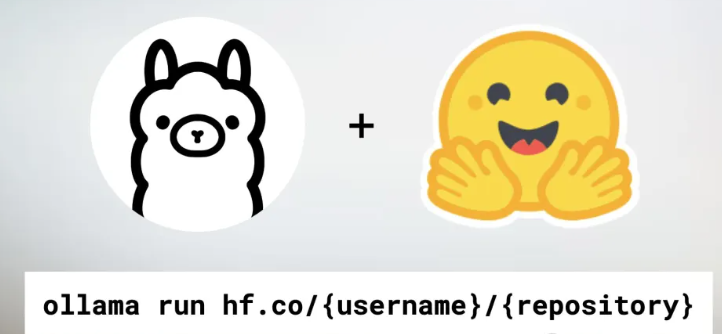

Ollama 支持直接运行Hugging Face 的GGUF 格式模型，具体可详参：[Use Ollama with any GGUF Model on Hugging Face Hub](https://huggingface.co/docs/hub/en/ollama)。

1. `ollama run hf.co/{username}/{repository}`
    ```
    ollama run hf.co/bartowski/Llama-3.2-1B-Instruct-GGUF
    ollama run hf.co/mlabonne/Meta-Llama-3.1-8B-Instruct-abliterated-GGUF
    ollama run hf.co/arcee-ai/SuperNova-Medius-GGUF
    ollama run hf.co/bartowski/Humanish-LLama3-8B-Instruct-GGUF
    ```
2. `ollama run hf.co/{username}/{repository}:{quantization}`

    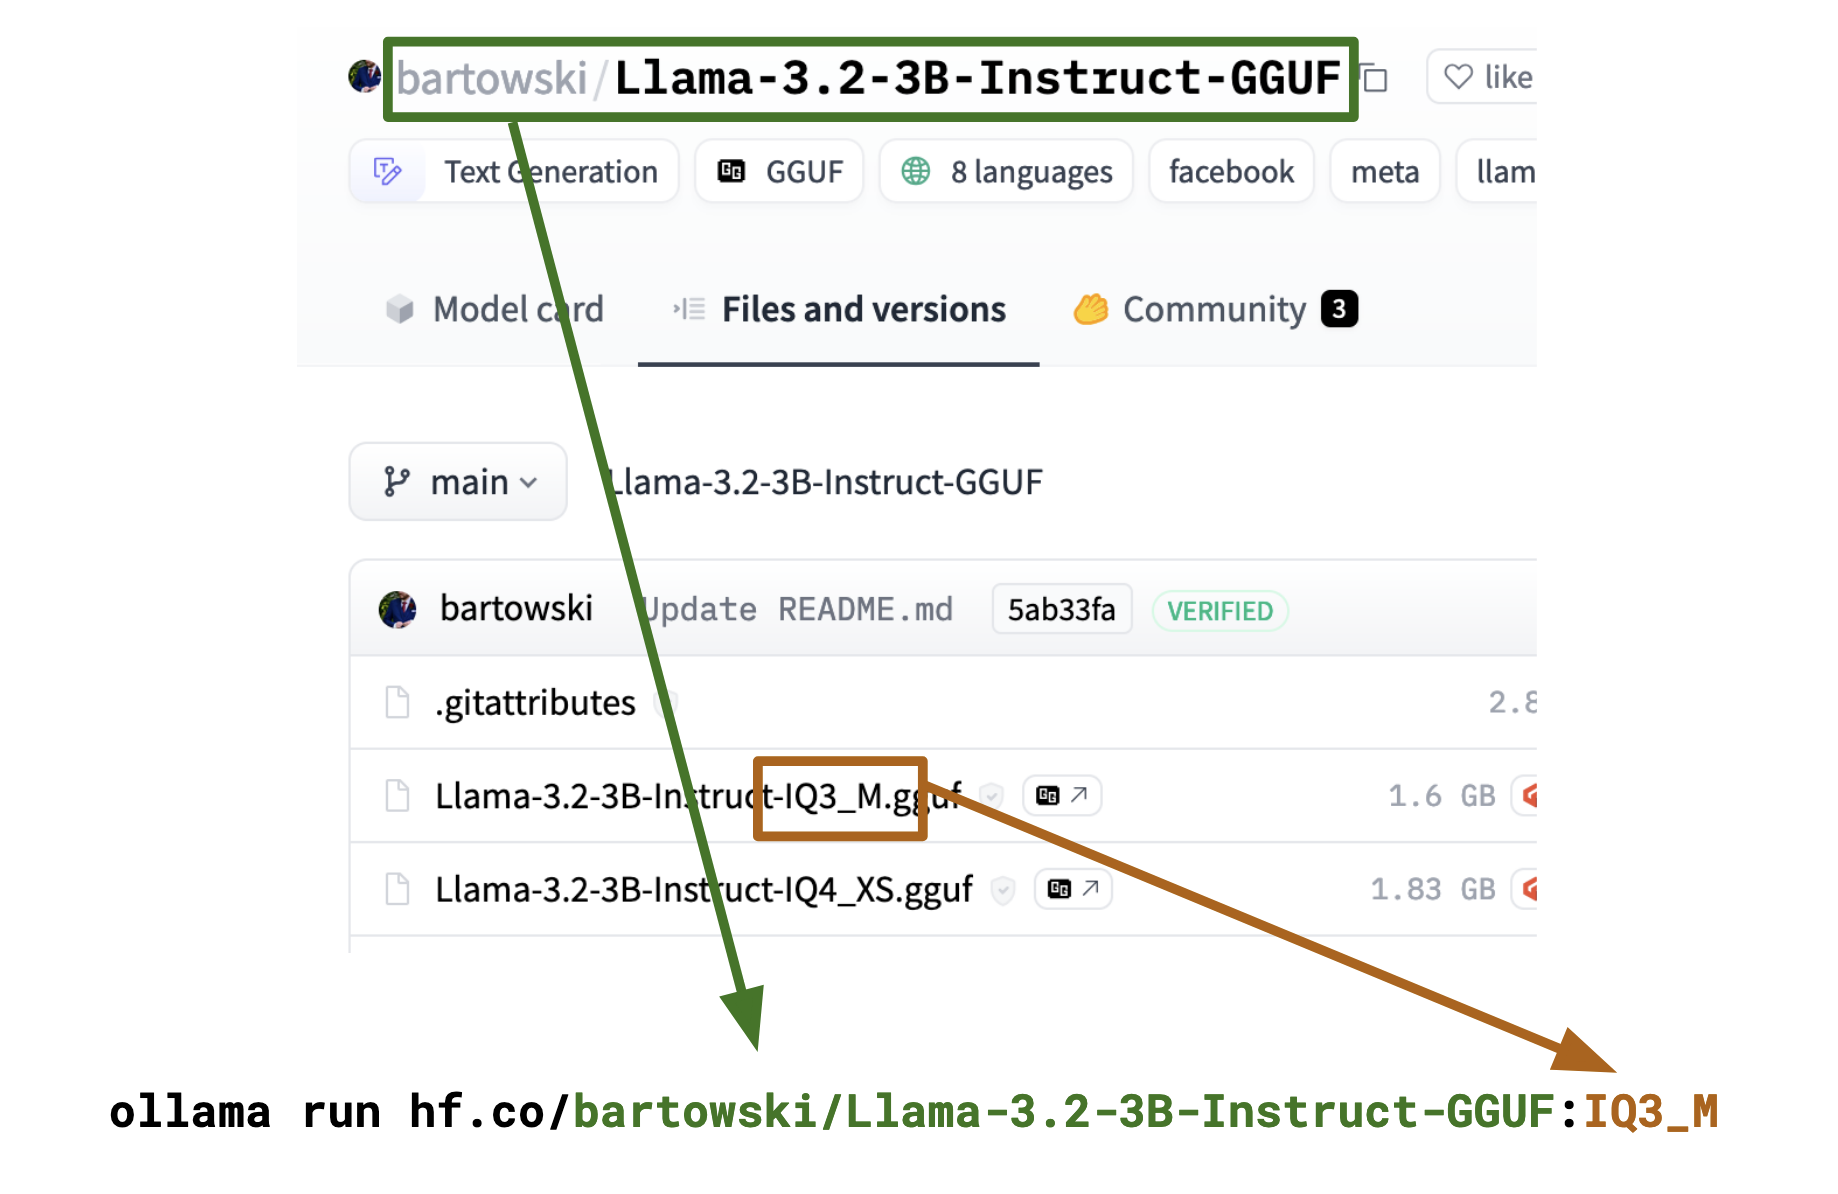

# SK 集成 Ollama 本地大模型

需要安装`Microsoft.SemanticKernel.Connectors.Ollama`，目前是实验版本，注意禁用Warning：
> #pragma warning disable SKEXP0070

In [28]:
#r "nuget: Microsoft.SemanticKernel.Connectors.Ollama,*-*"

Installed Packages Microsoft.SemanticKernel.Connectors.Ollama, 1.41.0-alpha

In [29]:
using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.ChatCompletion;
using Microsoft.SemanticKernel.Connectors.Ollama;

var builder = Kernel.CreateBuilder();
var chatModelId = "llama3.2";
var embeddingModelId = "quentinz/bge-large-zh-v1.5:latest";
var endpoint = new Uri("http://localhost:11434");

#pragma warning disable SKEXP0070
builder.Services.AddOllamaChatCompletion(chatModelId, endpoint);
builder.Services.AddOllamaTextEmbeddingGeneration(embeddingModelId, endpoint);
#pragma warning restore SKEXP0070
var kernel = builder.Build();

聊天补全示例：

In [30]:
var response = await kernel.InvokePromptAsync("Who are you?");
response.Display();

I'm an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta AI." Function InvokePromptAsync_e679ce2ddc254a959ec3fce69ae46401 Name InvokePromptAsync_e679ce2ddc254a959ec3fce69ae46401 PluginName <null> Description Generic function, unknown purpose Metadata Microsoft.SemanticKernel.KernelFunctionMetadata Name InvokePromptAsync_e679ce2ddc254a959ec3fce69ae46401 PluginName <null> Description Generic function, unknown purpose Parameters (empty) ReturnParameter Microsoft.SemanticKernel.KernelReturnParameterMetadata Description ParameterType <null> Schema <null> AdditionalProperties (empty) ExecutionSettings (empty) Metadata <null> Culture Parent Parent Parent Parent Parent LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - TextInfo TextInfo - IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo DateTimeFormat System.Globalization.DateTimeFormatInfo Calendar System.Globalization.GregorianCalendar OptionalCalendars [ System.Globalization.GregorianCalendar ] UseUserOverride False IsReadOnly True LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - Name Version System.Globalization.SortVersion LCID 127 TextInfo TextInfo - ANSICodePage 1252 OEMCodePage 437 MacCodePage 10000 EBCDICCodePage 37 LCID 127 CultureName IsReadOnly True ListSeparator , IsRightToLeft False IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo CurrencyDecimalDigits 2 CurrencyDecimalSeparator . IsReadOnly True CurrencyGroupSizes [ 3 ] NumberGroupSizes [ 3 ] PercentGroupSizes [ 3 ] CurrencyGroupSeparator , CurrencySymbol ¤ NaNSymbol NaN CurrencyNegativePattern 0 NumberNegativePattern 1 PercentPositivePattern 0 PercentNegativePattern 0 NegativeInfinitySymbol -Infinity NegativeSign - NumberDecimalDigits 2 NumberDecimalSeparator . NumberGroupSeparator , CurrencyPositivePattern 0 PositiveInfinitySymbol Infinity PositiveSign + PercentDecimalDigits 2 PercentDecimalSeparator . PercentGroupSeparator , PercentSymbol % PerMilleSymbol ‰ NativeDigits [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ] DigitSubstitution None DateTimeFormat System.Globalization.DateTimeFormatInfo AMDesignator AM Calendar System.Globalization.GregorianCalendar DateSeparator / FirstDayOfWeek Sunday CalendarWeekRule FirstDay FullDateTimePattern dddd, dd MMMM yyyy HH:mm:ss LongDatePattern dddd, dd MMMM yyyy LongTimePattern HH:mm:ss MonthDayPattern MMMM dd PMDesignator PM RFC1123Pattern ddd, dd MMM yyyy HH':'mm':'ss 'GMT' ShortDatePattern MM/dd/yyyy ShortTimePattern HH:mm SortableDateTimePattern yyyy'-'MM'-'dd'T'HH':'mm':'ss TimeSeparator : UniversalSortableDateTimePattern yyyy'-'MM'-'dd HH':'mm':'ss'Z' YearMonthPattern yyyy MMMM AbbreviatedDayNames [ Sun, Mon, Tue, Wed, Thu, Fri, Sat ] ShortestDayNames [ Su, Mo, Tu, We, Th, Fr, Sa ] DayNames [ Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday ] AbbreviatedMonthNames [ Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, ] MonthNames [ January, February, March, April, May, June, July, August, September, October, November, December, ] IsReadOnly True NativeCalendarName Gregorian Calendar AbbreviatedMonthGenitiveNames [ Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, ] MonthGenitiveNames [ January, February, March, April, May, June, July, August, September, October, November, December, ] Calendar System.Globalization.GregorianCale

Function Calling  调用举例：

In [31]:
kernel.Plugins.Clear();
kernel.ImportPluginFromFunctions("HelperFunctions",
        [            
            kernel.CreateFunctionFromMethod(() => DateTime.UtcNow.ToString("R"), "GetCurrentDateTimeInUtc", "Retrieves the current date time in UTC."),
            kernel.CreateFunctionFromMethod((string location) => {
                return $"The weather in {location} is sunny.";
            }, "GetWeather", "Retrieves the weather for a location.")
        ]);

In [32]:
#pragma warning disable SKEXP0070
OllamaPromptExecutionSettings  settings = new() 
{ 
    FunctionChoiceBehavior = FunctionChoiceBehavior.Auto() 
};
var response = await kernel.InvokePromptAsync(
    "What is the weather today in Beijing?", new(settings));
response.Display();

response = await kernel.InvokePromptAsync("What is the time now?", new(settings));

response.Display();

The current weather in Beijing is sunny. Would you like to know the temperature or any other specific details? Function InvokePromptAsync_1789f1ad3b304d83b705136a9fa09305 Name InvokePromptAsync_1789f1ad3b304d83b705136a9fa09305 PluginName <null> Description Generic function, unknown purpose Metadata Microsoft.SemanticKernel.KernelFunctionMetadata Name InvokePromptAsync_1789f1ad3b304d83b705136a9fa09305 PluginName <null> Description Generic function, unknown purpose Parameters (empty) ReturnParameter Microsoft.SemanticKernel.KernelReturnParameterMetadata Description ParameterType <null> Schema <null> AdditionalProperties (empty) ExecutionSettings (empty) Metadata <null> Culture Parent Parent Parent Parent Parent LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - TextInfo TextInfo - IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo DateTimeFormat System.Globalization.DateTimeFormatInfo Calendar System.Globalization.GregorianCalendar OptionalCalendars [ System.Globalization.GregorianCalendar ] UseUserOverride False IsReadOnly True LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - Name Version System.Globalization.SortVersion LCID 127 TextInfo TextInfo - ANSICodePage 1252 OEMCodePage 437 MacCodePage 10000 EBCDICCodePage 37 LCID 127 CultureName IsReadOnly True ListSeparator , IsRightToLeft False IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo CurrencyDecimalDigits 2 CurrencyDecimalSeparator . IsReadOnly True CurrencyGroupSizes [ 3 ] NumberGroupSizes [ 3 ] PercentGroupSizes [ 3 ] CurrencyGroupSeparator , CurrencySymbol ¤ NaNSymbol NaN CurrencyNegativePattern 0 NumberNegativePattern 1 PercentPositivePattern 0 PercentNegativePattern 0 NegativeInfinitySymbol -Infinity NegativeSign - NumberDecimalDigits 2 NumberDecimalSeparator . NumberGroupSeparator , CurrencyPositivePattern 0 PositiveInfinitySymbol Infinity PositiveSign + PercentDecimalDigits 2 PercentDecimalSeparator . PercentGroupSeparator , PercentSymbol % PerMilleSymbol ‰ NativeDigits [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ] DigitSubstitution None DateTimeFormat System.Globalization.DateTimeFormatInfo AMDesignator AM Calendar System.Globalization.GregorianCalendar DateSeparator / FirstDayOfWeek Sunday CalendarWeekRule FirstDay FullDateTimePattern dddd, dd MMMM yyyy HH:mm:ss LongDatePattern dddd, dd MMMM yyyy LongTimePattern HH:mm:ss MonthDayPattern MMMM dd PMDesignator PM RFC1123Pattern ddd, dd MMM yyyy HH':'mm':'ss 'GMT' ShortDatePattern MM/dd/yyyy ShortTimePattern HH:mm SortableDateTimePattern yyyy'-'MM'-'dd'T'HH':'mm':'ss TimeSeparator : UniversalSortableDateTimePattern yyyy'-'MM'-'dd HH':'mm':'ss'Z' YearMonthPattern yyyy MMMM AbbreviatedDayNames [ Sun, Mon, Tue, Wed, Thu, Fri, Sat ] ShortestDayNames [ Su, Mo, Tu, We, Th, Fr, Sa ] DayNames [ Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday ] AbbreviatedMonthNames [ Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, ] MonthNames [ January, February, March, April, May, June, July, August, September, October, November, December, ] IsReadOnly True NativeCalendarName Gregorian Calendar AbbreviatedMonthGenitiveNames [ Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, ] MonthGenitiveNames [ January, February, March, April, May, June, July, August, September, October, November, December, ] Calendar System.Globalization.Greg

The current time is Tuesday, March 18, 2025 7:02 AM GMT. Function InvokePromptAsync_dc71ce1a96214ee9bd0ec872ede8ed63 Name InvokePromptAsync_dc71ce1a96214ee9bd0ec872ede8ed63 PluginName <null> Description Generic function, unknown purpose Metadata Microsoft.SemanticKernel.KernelFunctionMetadata Name InvokePromptAsync_dc71ce1a96214ee9bd0ec872ede8ed63 PluginName <null> Description Generic function, unknown purpose Parameters (empty) ReturnParameter Microsoft.SemanticKernel.KernelReturnParameterMetadata Description ParameterType <null> Schema <null> AdditionalProperties (empty) ExecutionSettings (empty) Metadata <null> Culture Parent Parent Parent Parent Parent LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - TextInfo TextInfo - IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo DateTimeFormat System.Globalization.DateTimeFormatInfo Calendar System.Globalization.GregorianCalendar OptionalCalendars [ System.Globalization.GregorianCalendar ] UseUserOverride False IsReadOnly True LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - Name Version System.Globalization.SortVersion LCID 127 TextInfo TextInfo - ANSICodePage 1252 OEMCodePage 437 MacCodePage 10000 EBCDICCodePage 37 LCID 127 CultureName IsReadOnly True ListSeparator , IsRightToLeft False IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo CurrencyDecimalDigits 2 CurrencyDecimalSeparator . IsReadOnly True CurrencyGroupSizes [ 3 ] NumberGroupSizes [ 3 ] PercentGroupSizes [ 3 ] CurrencyGroupSeparator , CurrencySymbol ¤ NaNSymbol NaN CurrencyNegativePattern 0 NumberNegativePattern 1 PercentPositivePattern 0 PercentNegativePattern 0 NegativeInfinitySymbol -Infinity NegativeSign - NumberDecimalDigits 2 NumberDecimalSeparator . NumberGroupSeparator , CurrencyPositivePattern 0 PositiveInfinitySymbol Infinity PositiveSign + PercentDecimalDigits 2 PercentDecimalSeparator . PercentGroupSeparator , PercentSymbol % PerMilleSymbol ‰ NativeDigits [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ] DigitSubstitution None DateTimeFormat System.Globalization.DateTimeFormatInfo AMDesignator AM Calendar System.Globalization.GregorianCalendar DateSeparator / FirstDayOfWeek Sunday CalendarWeekRule FirstDay FullDateTimePattern dddd, dd MMMM yyyy HH:mm:ss LongDatePattern dddd, dd MMMM yyyy LongTimePattern HH:mm:ss MonthDayPattern MMMM dd PMDesignator PM RFC1123Pattern ddd, dd MMM yyyy HH':'mm':'ss 'GMT' ShortDatePattern MM/dd/yyyy ShortTimePattern HH:mm SortableDateTimePattern yyyy'-'MM'-'dd'T'HH':'mm':'ss TimeSeparator : UniversalSortableDateTimePattern yyyy'-'MM'-'dd HH':'mm':'ss'Z' YearMonthPattern yyyy MMMM AbbreviatedDayNames [ Sun, Mon, Tue, Wed, Thu, Fri, Sat ] ShortestDayNames [ Su, Mo, Tu, We, Th, Fr, Sa ] DayNames [ Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday ] AbbreviatedMonthNames [ Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, ] MonthNames [ January, February, March, April, May, June, July, August, September, October, November, December, ] IsReadOnly True NativeCalendarName Gregorian Calendar AbbreviatedMonthGenitiveNames [ Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, ] MonthGenitiveNames [ January, February, March, April, May, June, July, August, September, October, November, December, ] Calendar System.Globalization.GregorianCalendar MinSupportedDateTime 1/1/0001 12:00:00 A

Embedding 示例：

In [33]:
using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.Embeddings;

#pragma warning disable SKEXP0001
var embeddingGenerator  = kernel.GetRequiredService<ITextEmbeddingGenerationService>();

var response = await embeddingGenerator
    .GenerateEmbeddingsAsync(["Ollama:Get up and running with large language models."]);

response.Display();

index,value
0,"[ -0.015619896, -0.001123916, -0.047033306, 0.031700864, 0.018831065, -0.018030616, -0.062909976, -0.0098228175, -0.011624538, 0.02440735, 0.014996011, -0.011616529, 0.01240978, -0.022910211, -0.015572232, 0.0152670555, -0.02139899, -0.022848004, 0.0015667947, -0.049193863 ... (1004 more) ]"
